<a href="https://colab.research.google.com/github/khandelwal1997/Machine-Learning-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
print(os.getcwd())

C:\Users\Welcome


IMPORTING DATA

In [ ]:
os.chdir("D:\edwisor data\online classes\ML\Case-Study-19-Machine-Learning-Part-IV")

In [ ]:
df=pd.read_csv("D:\edwisor data\online classes\ML\Case-Study-19-Machine-Learning-Part-IV\kyphosis.csv")

EXPLORATARY DATA ANALYSIS

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
df.shape

(81, 4)

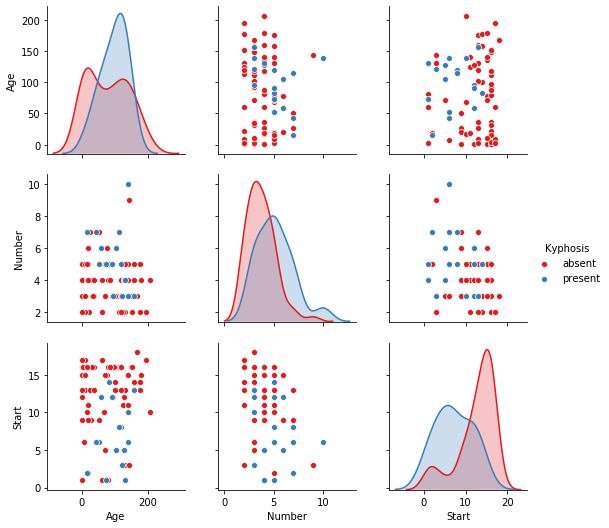

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

TEST TRAIN SPLIT OF DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('Kyphosis',axis=1)

In [ ]:
y=df['Kyphosis']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=30)

DECISION TREE CLASSIFIER FITTING

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
prediction=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

CLASSIFICATION REPORT AND CONFUSION MATRIX CREATION

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.83      0.80      0.82        25
     present       0.17      0.20      0.18         5

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.72      0.70      0.71        30



In [ ]:
print(confusion_matrix(y_test,prediction))

[[20  5]
 [ 4  1]]


In [ ]:
from IPython.display import Image


In [ ]:
from sklearn.externals.six import StringIO

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [1]:
from sklearn.tree import export_graphviz



In [ ]:
features=list(df.columns[1:])

In [ ]:
features

['Age', 'Number', 'Start']

In [ ]:
dot_data=StringIO()

In [ ]:
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement pydot (from versions: none)
ERROR: No matching distribution found for pydot


RANDOM FOREST CLASSIFIER


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(X_train,y_train)

Wall time: 4.72 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

CLASSIFIER SCORE

In [ ]:
classifier_rf.oob_score_

0.8431372549019608

CHECK FOR BEST N_ESTIMATORS,MAX_DEPTH WITH HELP OF GRIDSEACHCV

In [ ]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [ ]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.4min finished
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 3min 27s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [ ]:
grid_search.best_score_

0.8235294117647058

In [ ]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

[Text(139.5, 226.5, 'Number <= 4.5\nentropy = 0.291\nsamples = 35\nvalue = [42, 9]\nclass = present'),
 Text(69.75, 135.9, 'Number <= 3.5\nentropy = 0.061\nsamples = 22\nvalue = [31, 1]\nclass = present'),
 Text(34.875, 45.29999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [19, 0]\nclass = present'),
 Text(104.625, 45.29999999999998, 'entropy = 0.142\nsamples = 10\nvalue = [12, 1]\nclass = present'),
 Text(209.25, 135.9, 'Number <= 5.5\nentropy = 0.488\nsamples = 13\nvalue = [11, 8]\nclass = present'),
 Text(174.375, 45.29999999999998, 'entropy = 0.444\nsamples = 8\nvalue = [8, 4]\nclass = present'),
 Text(244.125, 45.29999999999998, 'entropy = 0.49\nsamples = 5\nvalue = [3, 4]\nclass = absent')]

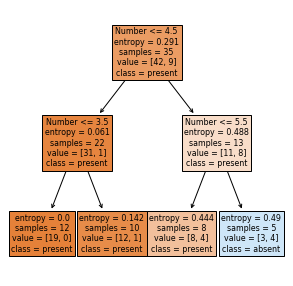

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(rf_best.estimators_[2],feature_names=X.columns,class_names=['present',"absent"],filled=True)

In [ ]:
rf_best.feature_importances_

array([0.25985484, 0.26296107, 0.47718409])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,Start,0.477184
1,Number,0.262961
0,Age,0.259855


NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
clsfi=BernoulliNB()

In [ ]:
clsfi.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred=clsfi.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[24  0]
 [ 6  0]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        24
     present       0.00      0.00      0.00         6

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


K NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [ ]:
cls.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_prd=cls.predict(X_test)

In [ ]:
cm1=confusion_matrix(y_test,y_prd)

In [ ]:
cm1

array([[20,  4],
       [ 5,  1]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

      absent       0.80      0.83      0.82        24
     present       0.20      0.17      0.18         6

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.68      0.70      0.69        30



KMEAN CLUSTRING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmn=KMeans(n_clusters=2)

In [ ]:
kmn.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmn.cluster_centers_

array([[133.56097561,   3.90243902,  11.97560976],
       [ 32.5       ,   4.2       ,  11.        ]])

TypeError: scatter() got multiple values for argument 's'

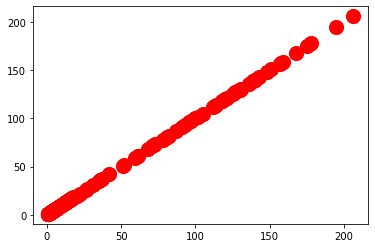

In [ ]:
plt.scatter(X, X, s =200, c='r')
plt.scatter(133.56097561,   3.90243902,  11.97560976, s=200, c='g', marker='s')
plt.scatter(32.5,4.2, 11.0, s=200, c='r', marker='s')
plt.show()

In [ ]:
kmn.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

FINDING BEST FIT BY ELBOW METHOD GRAPH

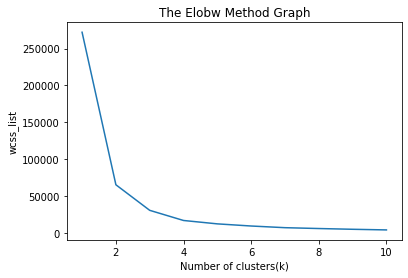

In [ ]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)
                            

In [ ]:
y_predict

array([2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
kmeans.cluster_centers_

array([[ 15.22222222,   3.92592593,  11.77777778],
       [142.57575758,   3.93939394,  11.72727273],
       [ 79.04761905,   4.38095238,  10.76190476]])

TypeError: scatter() got multiple values for argument 's'

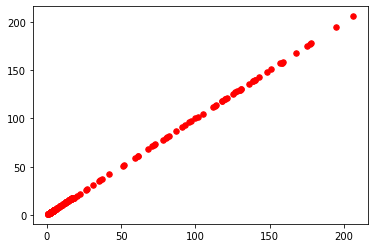

In [ ]:
plt.scatter(X, X, s =30, c='r')
plt.scatter(15.22222222,   3.92592593,  11.77777778, s=10, c='g', marker='s')
plt.scatter(142.57575758,   3.93939394,  11.72727273, s=10, c='r', marker='s')
plt.scatter(79.04761905,   4.38095238,  10.76190476, s=10, c='r', marker='s')
plt.show()